In [1]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


### Sentiment Scoring Using SentiWordNet

In [2]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None


In [3]:
def get_sentiment_score(text):

    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)

    for sentence in raw_sentences:

        sent_score = 0
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))


    return (total_score / len(raw_sentences)) * 100


In [4]:
reviews = pd.read_csv("small_corpus.csv")
reviews.shape


(2340, 12)

In [7]:
reviews


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,1.0,True,"03 11, 2018",A6CXK8NXD50R2,B0092UF54A,"{'Size:': ' 9.5 B(M) US', 'Color:': ' Wolf Grey/Platinum/White/Crimson'}",MMB,They looked very cheap,Returned...looked cheap,1520726400,NaN,NaN
1,1.0,True,"01 10, 2018",A23TE15JI8Q2YQ,B009MA34NY,"{'Size:': ' 6 B(M) US', 'Color:': ' Racer Blue/Obsidian/Blue Tint'}",sonia,Artculo equivocado en color,One Star,1515542400,NaN,['https://images-na.ssl-images-amazon.com/images/I/81-b35fKqUL._SY88.jpg']
2,1.0,True,"01 4, 2017",A199ICSPL9EXJ5,B001IKJOLW,"{'Size:': ' 9.5 B(M) US', 'Color:': ' Black/Wolf Grey/White/Pink'}",KaDecha Richardson,"Returning these. the pictures on here make the shoe appear all black with a touch of pink in the check. however, the whole shoe has pink coming through. I was looking for an all black shoe. I ordered the Nike Women's Flex Supreme TR3 instead and love them!!!",I ordered the Nike Women's Flex Supreme TR3 instead and love them!,1483488000,NaN,NaN
3,1.0,True,"01 4, 2017",A199ICSPL9EXJ5,B0092UF54A,"{'Size:': ' 9.5 B(M) US', 'Color:': ' Black/Wolf Grey/White/Pink'}",KaDecha Richardson,"Returning these. the pictures on here make the shoe appear all black with a touch of pink in the check. however, the whole shoe has pink coming through. I was looking for an all black shoe. I ordered the Nike Women's Flex Supreme TR3 instead and love them!!!",I ordered the Nike Women's Flex Supreme TR3 instead and love them!,1483488000,NaN,NaN
4,1.0,True,"09 12, 2016",A39XW67H6XEUOJ,B005AGO4LU,"{'Size:': ' 8.5 B(M) US', 'Color:': ' Wolf Grey/Black-pink Blast/White'}",Kris L. Brown,"Unfortunately, this Flex Supreme does NOT have enough support over the toe and ankle are for my requirements.\nReturning for credit. Thanks anyway.",Did not fit my feet,1473638400,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2335,5.0,True,"08 27, 2017",A5Z3UGOPDBJPW,B0092UF54A,"{'Size:': ' 8 B(M) US', 'Color:': ' Black'}",Carol,Good looking shoe,Shoes,1503792000,NaN,NaN
2336,5.0,True,"04 3, 2018",A3RHNGQAZWUX01,B009MA34NY,"{'Size:': ' 9 B(M) US', 'Color:': ' Black/White/Anthracite/Stealth'}",Masher41,second pair. Comfortable and great for people with bunion issues or previous surgeries. Sole wears great,staple sneakers,1522713600,NaN,NaN
2337,5.0,True,"06 15, 2017",A3UO0DDWXIJ8DW,B0014F7B98,"{'Size:': ' 9 B(M) US', 'Color:': ' Racer Blue/Obsidian/Blue Tint'}",Dawn Houston,they are very comfortable feel like you have nothing on.,Five Stars,1497484800,NaN,NaN
2338,5.0,True,"01 7, 2018",A1FQAVH5JBSV6A,B014IBJKNO,"{'Size:': ' 8.5 M US', 'Color:': ' Wolf Grey/Black-pink Blast/White'}",Renata,I Love it. It is very light and the color is great.,Five Stars,1515283200,NaN,NaN


In [8]:
reviews.dropna(subset=['reviewText'], inplace=True)
reviews.shape


(2327, 12)

In [13]:
!pip install nltk
import nltk

# Download the 'punkt' resource
nltk.download('punkt')
nltk.download('vader_lexicon')

# Assuming get_sentiment_score function is already defined
def get_sentiment_score(text):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)

    return sentiment['compound'] # or any other relevant sentiment score

# Apply get_sentiment_score to the 'reviewText' column to create the 'swn_score' column
reviews['swn_score'] = reviews['reviewText'].apply(lambda text: get_sentiment_score(text))
reviews['swn_score'] = reviews['swn_score'].fillna(0)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
reviews[['reviewText','swn_score']].sample(3)


,reviewText,swn_score
2220,I love these shoes. They fit as expected and they look really nice on. These shoes have a narrow base which I really like. I don't like the ones that make your foot look wide.,0.9369
1558,I have gotten so many compliments on the blue color and look of this shoe. It is super comfortable. The grip is wonderful for my indoor gym cross training classes. I always order a half size larger in Nike brand shoes and thy fit perfectly as I did with this shoe.,0.9665
251,"Fit is fine, but not much cushioning in the footbed. The first time wearing them on a long walk I developed a blister on the bottom of my foot.",0.2846


In [15]:
reviews[['reviewText','swn_score']].sample(3)


,reviewText,swn_score
2114,Beautiful I love them comfy,0.8442
397,"This is a shoe I will wear with black dress pants or jeans when I need comfort and a little style, but I am not impressed. This is a very flimsy shoe with little support at all. Not like any Nike I've ever purchased in the past. It looks nice, but it's not comfortable.",-0.2473
1813,"My son likes these, and this is the 2nd pair he's worn.",0.1531


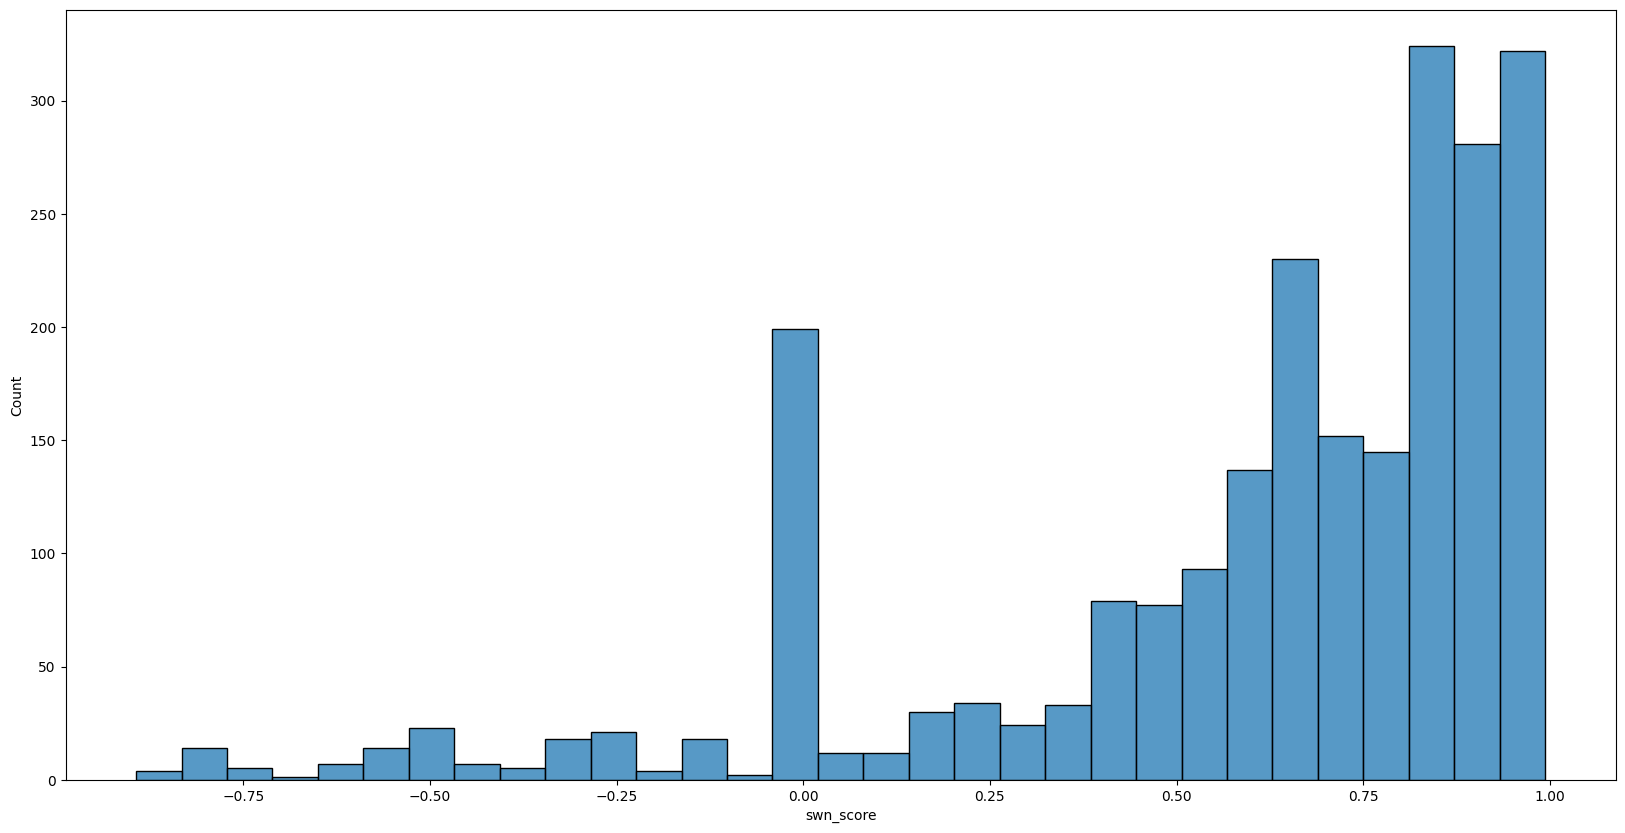

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()


In [17]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))
reviews['swn_sentiment'].value_counts(dropna=False)


,count
swn_sentiment,
neutral,1692
negative,635


<Axes: xlabel='overall', ylabel='count'>

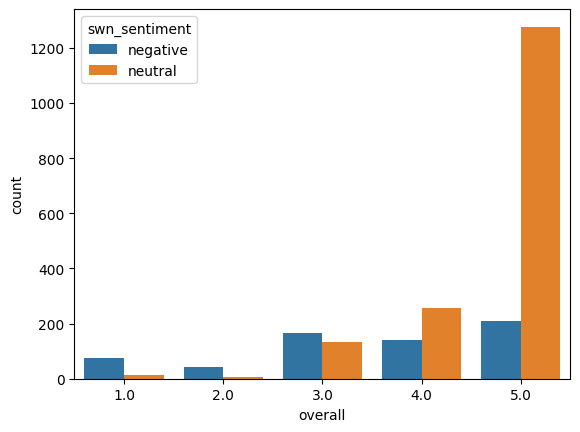

In [18]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews)


<Axes: xlabel='swn_sentiment', ylabel='overall'>

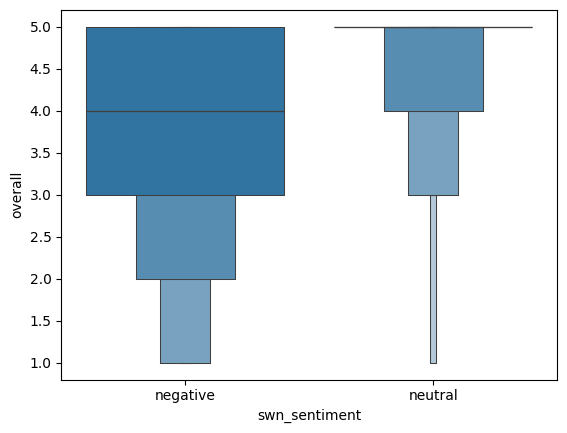

In [19]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews)


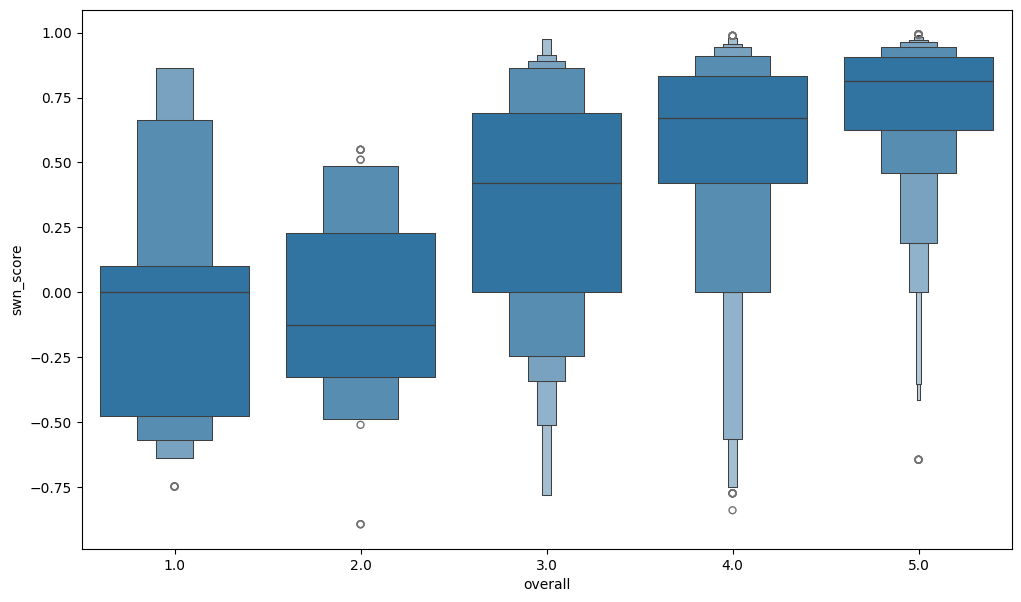

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)
plt.show()


In [22]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))


In [23]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()


In [24]:
len(y_swn_pred), len(y_true)


(2327, 2327)

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)


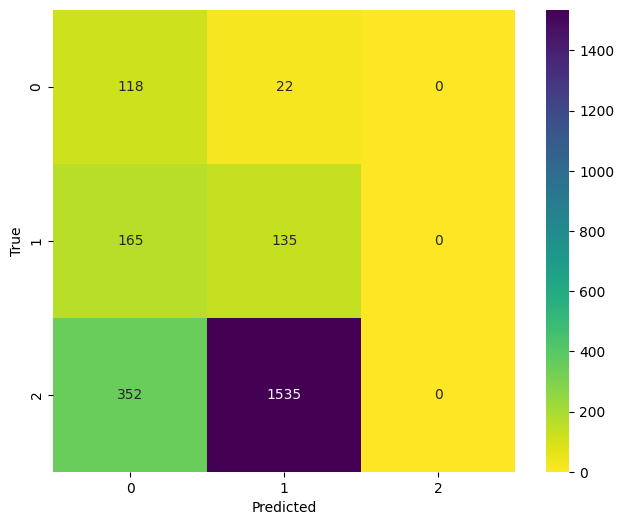

In [26]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');


In [45]:
cm = list(cm.ravel())
cm


[118, 22, 0, 165, 135, 0, 352, 1535, 0]

## Performance Assessment

### Negative Sentiment Prediction Assessment

In [49]:
tp, tn, fp, fn = 118+135, 118+352, 165, 22+1535


In [50]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)


In [51]:
print("recall: {}\nprecision: {}\nF1 score: {}".format(recall, precision, f1))


recall: 0.0797872340425532
precision: 0.45
F1 score: 0.1355421686746988


### Positive Sentiment Prediction Assessment

In [ ]:
tp, tn, fp, fn = 1310, 1088+265+70+188, 242+647, 142+547

In [ ]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)


In [ ]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.655327663831916
precission: 0.5957253296953161
f1 score: 0.6241067174845164


## Sentiment Scoring Model Using NLTK Opinion Lexicon

In [28]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize


In [29]:
nltk.download("opinion_lexicon")


[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [30]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())


In [32]:
def get_sentiment_score_oplex(text):
    total_score = 0

    raw_sentences = sent_tokenize(text)

    for sentence in raw_sentences:

        sent_score = 0
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))


    return total_score


In [34]:
reviews['oplex_sentiment_score'] = reviews['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))
reviews['oplex_sentiment_score'] = reviews['oplex_sentiment_score'].fillna(0)


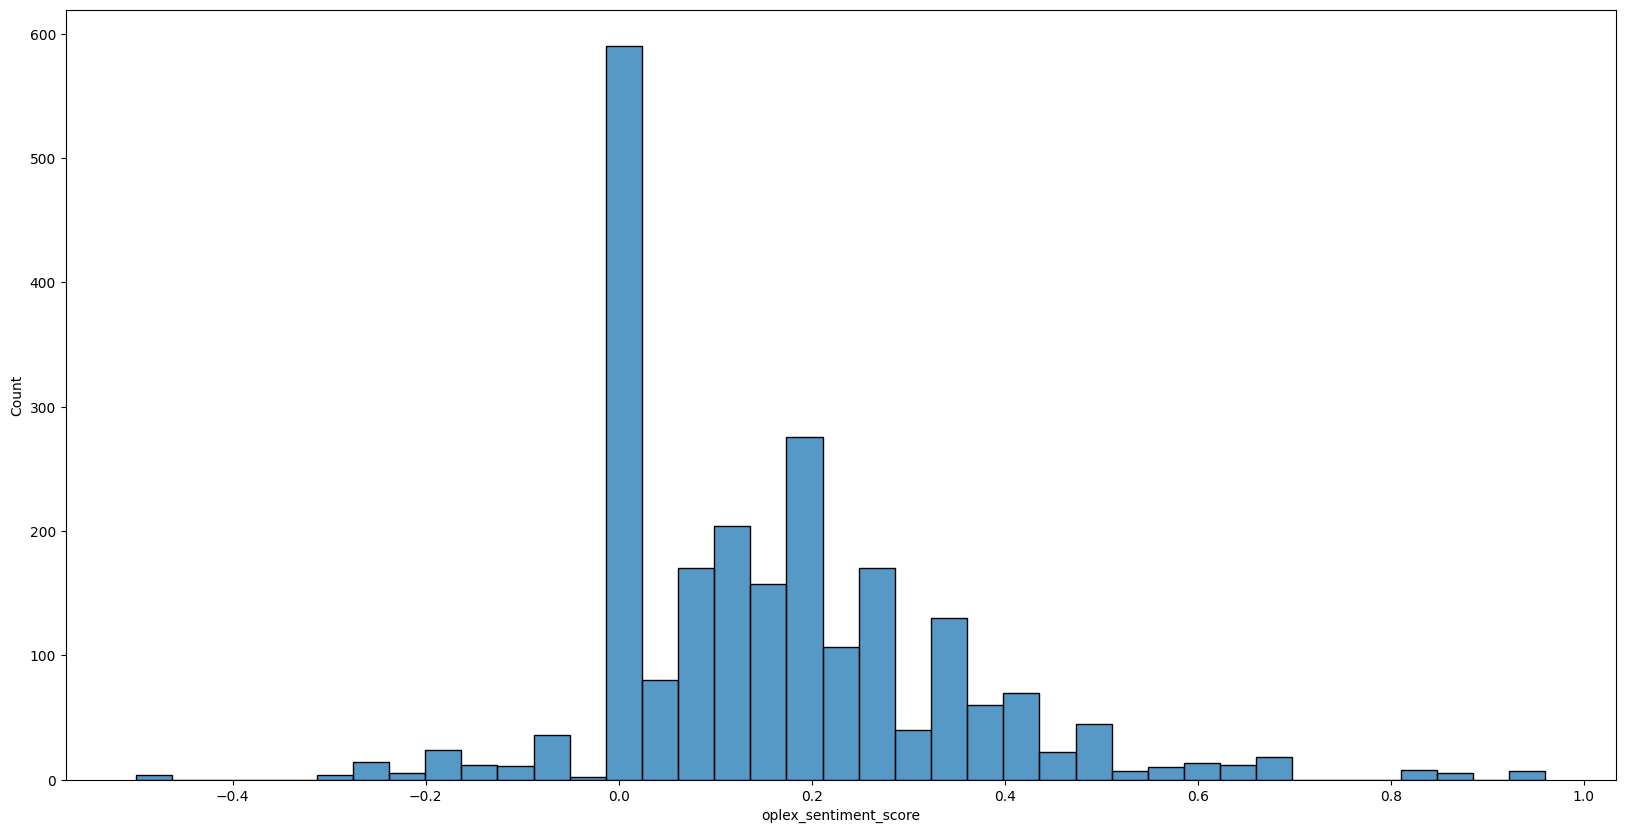

In [35]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()


In [36]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))


In [37]:
reviews['oplex_sentiment'].value_counts(dropna=False)


,count
oplex_sentiment,
positive,1344
neutral,871
negative,112


<Axes: xlabel='overall', ylabel='count'>

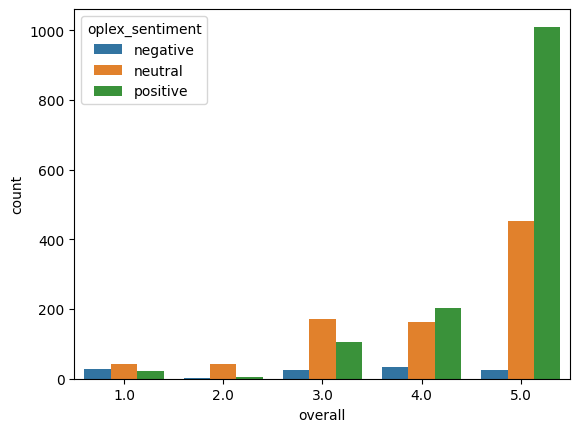

In [39]:
sns.countplot(x='overall', hue='oplex_sentiment', data = reviews)


<Axes: xlabel='oplex_sentiment', ylabel='overall'>

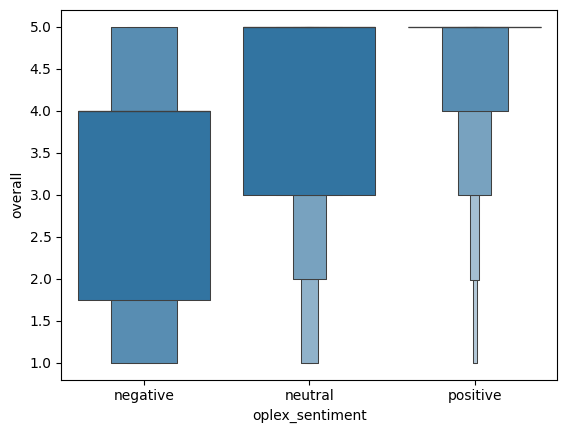

In [40]:
sns.boxenplot(x='oplex_sentiment', y='overall', data = reviews)


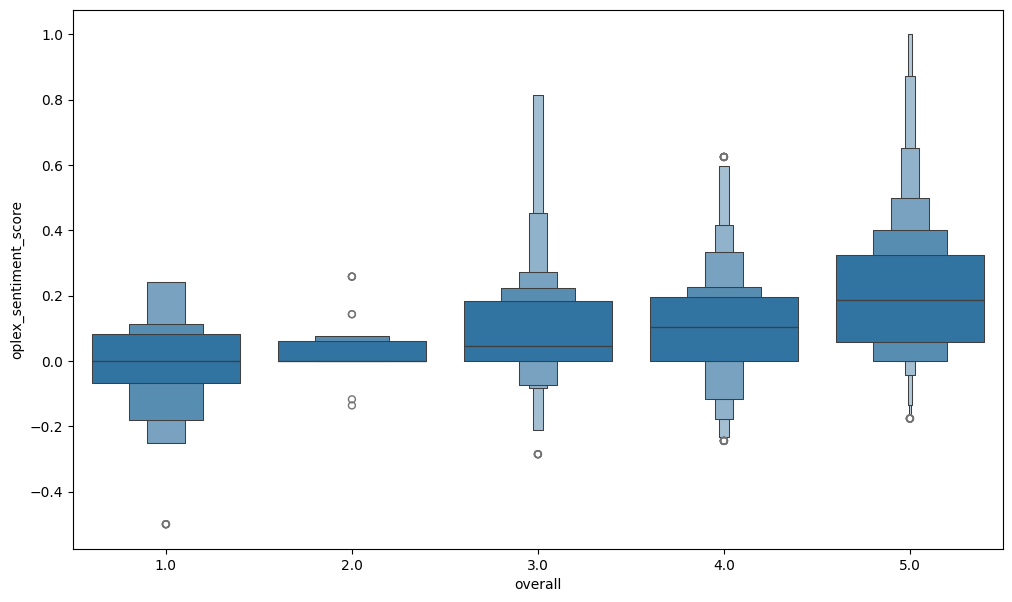

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()


In [42]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()
oplex_cm = confusion_matrix(y_true, y_oplex_pred)


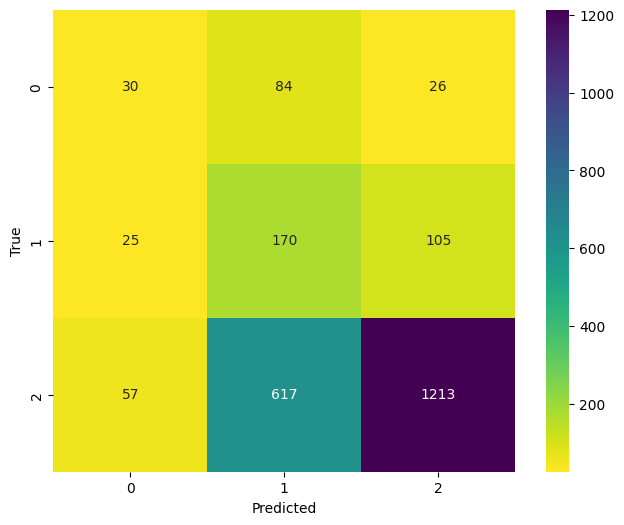

In [43]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');


In [44]:
oplex_cm = list(oplex_cm.ravel())
oplex_cm


[30, 84, 26, 25, 170, 105, 57, 617, 1213]

### Negative Label Assessment

In [ ]:
tp, tn, fp, fn = 804, 195+199+686+1181, 106+132, 701+495

In [ ]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.402
precission: 0.7715930902111324
f1 score: 0.5285996055226825


### Positive Label Assessment

In [ ]:
tp, tn, fp, fn = 1181, 804+701+106+195, 495+199, 132+686

In [ ]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.5907953976988495
precission: 0.6298666666666667
f1 score: 0.6097057305110997


In [ ]:
# # Step 1: Install necessary libraries (skip if already installed)
# !pip install transformers torch
# # The error is probably due to an outdated version, so force reinstall
# !pip install --upgrade transformers

# # Step 2: Import libraries
# import torch
# from transformers import AutoTokenizer, AutoModelForSequenceClassification # Use AutoClasses
# from transformers import pipeline
# import pandas as pd # Import pandas to work with DataFrames

# # Step 3: Load the DistilBERT model and tokenizer
# # Use AutoClasses to load the model and tokenizer
# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
# model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# # Step 4: Define a function to get sentiment scores using the model
# def get_sentiment_score_deep_learning(text):
#     inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
#     outputs = model(**inputs)
#     # Get softmax scores for each label
#     probs = torch.nn.functional.softmax(outputs.logits, dim=1)
#     sentiment_score = probs.detach().numpy().flatten()
#     # Assign positive and negative scores
#     score = {'Negative': sentiment_score[0], 'Positive': sentiment_score[1]}
#     return score

# # Step 5: Create a sample DataFrame (replace with your actual data)
# # Assuming you have a CSV file named 'your_data.csv' with a 'text' column
# # df = pd.read_csv('your_data.csv')
# # For demonstration purposes, let's create a sample DataFrame:
# df = pd.DataFrame({'text': ['This is a great product!', 'I had a terrible experience.']})

# # Step 6: Apply this function to each text entry in the DataFrame
# df['DeepLearning_SentimentScore'] = df['text'].apply(get_sentiment_score_deep_learning)

# # Optional: Display sample results
# df[['text', 'DeepLearning_SentimentScore']].head()


In [52]:
# Install necessary libraries (skip if already installed)
!pip install transformers torch pandas
!pip install --upgrade transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [53]:
# Import libraries
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd


In [54]:
# Load the DistilBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [60]:
# Define a function to get sentiment scores using the model
def get_sentiment_score_deep_learning(text):
    # Ensure the input is a string, handling potential non-string values
    text = str(text)  # Convert input to string to avoid type errors
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    # Get model outputs
    outputs = model(**inputs)
    # Calculate softmax scores
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)
    # Extract sentiment scores
    sentiment_score = probs.detach().numpy().flatten()
    # Assign positive and negative scores
    score = {'Negative': sentiment_score[0], 'Positive': sentiment_score[1]}
    return score


In [62]:
df = pd.read_csv("small_corpus.csv")
df['DeepLearning_SentimentScore'] = df['reviewText'].apply(get_sentiment_score_deep_learning)

# Change 'text' to 'reviewText' to match the actual column name in the DataFrame
print(df[['reviewText', 'DeepLearning_SentimentScore']])


                                                                                                                                                                                                                                 reviewText  \
0                                                                                                                                                    These shoes are great.  This is the second pair that I have purchased and I love them.   
1                                                                                                                                                                               Love them!  Very comfortable and great for weight training!   
2                                                                                                              This is a very attractive shoe. It is true to size and fits as expected. Very satisfied with the seller - delivered on time.   
3                                           

In [64]:
# Analyze results
def analyze_results(df):
    df[['Negative', 'Positive']] = pd.json_normalize(df['DeepLearning_SentimentScore'])
    df['Predicted_Sentiment'] = df.apply(lambda x: 'Positive' if x['Positive'] > x['Negative'] else 'Negative', axis=1)
    return df

# Apply the analysis function
df = analyze_results(df)
# Change 'text' to 'reviewText' to match the actual column name in the DataFrame
print(df[['reviewText', 'Negative', 'Positive', 'Predicted_Sentiment']]) # Changed 'text' to 'reviewText'


                                                                                                                                                                                                                                 reviewText  \
0                                                                                                                                                    These shoes are great.  This is the second pair that I have purchased and I love them.   
1                                                                                                                                                                               Love them!  Very comfortable and great for weight training!   
2                                                                                                              This is a very attractive shoe. It is true to size and fits as expected. Very satisfied with the seller - delivered on time.   
3                                           

In [65]:
df


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,DeepLearning_SentimentScore,Negative,Positive,Predicted_Sentiment
0,5.0,False,"10 24, 2016",A1TEBP1FCCJW5V,B005AGO4LU,"{'Size:': ' 7 B(M) US', 'Color:': ' Racer Blue/Obsidian/Blue Tint'}",Amazon Customer,These shoes are great. This is the second pair that I have purchased and I love them.,Really Comfortable Shoes,1477267200,NaN,NaN,"{'Negative': 0.00012717175, 'Positive': 0.9998728}",0.000127,0.999873,Positive
1,5.0,True,"10 29, 2016",A2CP5A30XO5JUO,B001IKJOLW,"{'Size:': ' 9 B(M) US', 'Color:': ' Wolf Grey/Black-pink Blast/White'}",Aaron O.,Love them! Very comfortable and great for weight training!,Love them! Very comfortable and great for weight training,1477699200,NaN,NaN,"{'Negative': 0.00011332111, 'Positive': 0.99988663}",0.000113,0.999887,Positive
2,5.0,True,"07 18, 2017",A1PFKS00R93MRZ,B014IBJKNO,"{'Size:': ' 8.5 M US', 'Color:': ' Black/Green Glow-blue Glow-white'}",Rakesh Duneja,This is a very attractive shoe. It is true to size and fits as expected. Very satisfied with the seller - delivered on time.,Very satisfied with the seller - delivered on time,1500336000,NaN,NaN,"{'Negative': 0.0002207349, 'Positive': 0.9997793}",0.000221,0.999779,Positive
3,5.0,True,"02 14, 2018",A2QRWCN5YR05G9,B0092UF54A,"{'Size:': ' 7 B(M) US', 'Color:': ' Black/White/Anthracite/Stealth'}",Amazon Customer,Very confortable.,Smooth and confortable.,1518566400,NaN,NaN,"{'Negative': 0.996926, 'Positive': 0.0030739314}",0.996926,0.003074,Negative
4,4.0,True,"07 18, 2017",A23H50RT6SLXY9,B0014F7B98,"{'Size:': ' 7.5 B(M) US', 'Color:': ' Wolf Grey/Platinum/White/Crimson'}",Edle Liljeblad,"Fits good, very lightweight.",Four Stars,1500336000,NaN,NaN,"{'Negative': 0.00017318576, 'Positive': 0.99982685}",0.000173,0.999827,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.0,True,"10 3, 2017",AQAY0P6DQAWDL,B001IKJOLW,"{'Size:': ' 6 B(M) US', 'Color:': ' Black'}",Ashley Files,Bought these as my back up shoes but they have turned into my daily ones I go to! So comfortable and my feet don't hurt after long hours on my feet. I own a cleaning business so I need my feet not to hurt in the middle of the day.,Honestly Fantastic Shoes,1506988800,NaN,NaN,"{'Negative': 0.00249762, 'Positive': 0.9975024}",0.002498,0.997502,Positive
996,4.0,True,"03 16, 2016",A3P1MRTMU7EH0D,B0014F7B98,"{'Size:': ' 8.5 B(M) US', 'Color:': ' Black/White/Anthracite/Stealth'}",Amy S.,"The shoes fit well in the arch area. They are a little wider in the toe area of the shoe, you feel like you have a lot of room. This does not make the shoe uncomfortable, just had to get used to it. Love the shoe.",you feel like you have a lot of room,1458086400,NaN,NaN,"{'Negative': 0.0017045545, 'Positive': 0.9982955}",0.001705,0.998295,Positive
997,5.0,True,"05 3, 2018",A2YIR9LKJO8W37,B009MA34NY,"{'Size:': ' 8 B(M) US', 'Color:': ' Grey'}",Hair_bear_xo,Love these shoes. My feet feel so much better. Lots of padding and light enough to run in.,Five Stars,1525305600,NaN,NaN,"{'Negative': 0.00024050617, 'Positive': 0.9997595}",0.000241,0.999759,Positive
998,5.0,True,"05 7, 2017",A1P2JWDZ4SFW78,B0014F7B98,"{'Size:': ' 6.5 B(M) US', 'Color:': ' White/Hyper Pink/Pure Platinum/Wolf Grey'}",ND,"Just because they are white, they do need a washing regularly but I have received many compliments on how pretty these white and pink shoes are. Extremely good Nike quality. Highly recommended.",Adorable shoes,1494115200,NaN,NaN,"{'Negative': 0.00019408247, 'Positive': 0.999806}",0.000194,0.999806,Positive


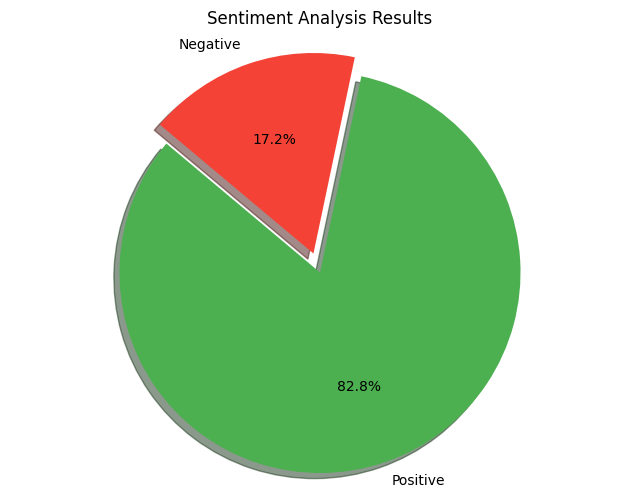

In [69]:
positive_score = df['DeepLearning_SentimentScore'].apply(lambda x: x['Positive']).sum()
negative_score = df['DeepLearning_SentimentScore'].apply(lambda x: x['Negative']).sum()

# Step 4: Prepare data for pie chart
labels = ['Positive', 'Negative']
sizes = [positive_score, negative_score]
colors = ['#4CAF50', '#F44336']  # Green for positive, Red for negative
explode = (0.1, 0)  # explode the 1st slice (Positive)

# Step 5: Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Analysis Results')
plt.show()
